# 中点法

**中点法（Midpoint method）** または **修正オイラー法（Modified Euler’s method）** は，始点 $t$ の代わりに，始点 $t$ と終点 $t+h$ の中間 $t + h / 2$ における関数の傾きを使って関数 $x(t+h)$ の値の近似を行う．すなわち，オイラー法から次のように修正した導関数，

$$
\begin{align}
x(t+h) = x(t) + h f\left (x \left (t + \frac{h}{2}\right),t+\frac{h}{2}\right)
\end{align}
$$

を利用する．

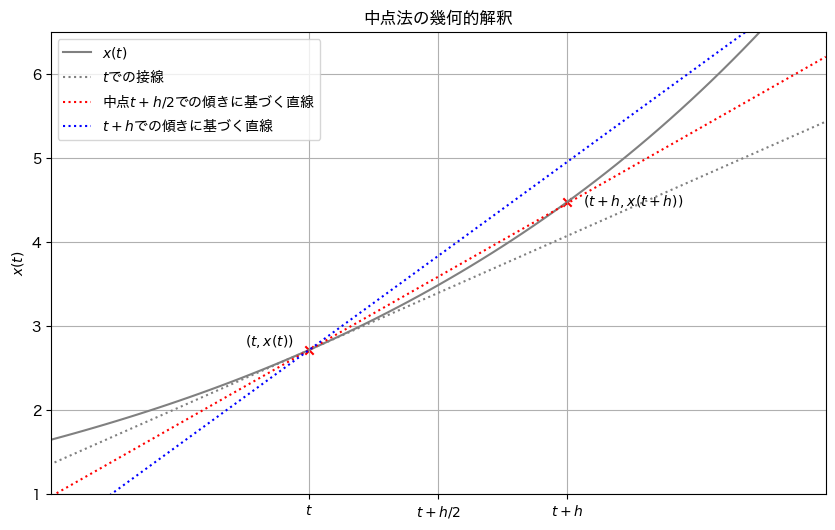

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 日本語フォントの設定
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Sans', 'Yu Gothic', 'Meiryo', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']

# 関数の定義
def f(t):
    return np.exp(t)

# 与えられた点 t とステップサイズ h
t = 1  # 例として t = 1
h = 0.5  # ステップサイズ h = 0.5

# t における x(t) の値
x_t = f(t)

# 傾き 傾き x'(t), x'(t+h/2), x'(t+h)
slope = np.exp(t)
slope_at_midpoint = np.exp(t + h / 2)
slope_at_t_h = np.exp(t + h)

# t における接線
tangent_line = lambda x: slope * (x - t) + x_t

# 中点 t+h/2 での傾き x'(t+h/2) に基づく接線（点 (t, x(t)) を通る）
tangent_line_from_midpoint = lambda x: slope_at_midpoint * (x - t) + x_t

# 点 t+h での傾き x'(t+h) に基づく接線（点 (t, x(t)) を通る）
tangent_line_from_t_h = lambda x: slope_at_t_h * (x - t) + x_t

# グラフの描画
plt.figure(figsize=(10, 6))
t_values = np.linspace(0, 2, 100)
plt.plot(t_values, f(t_values), label=r'$x(t)$', color='grey')
plt.plot(t_values, tangent_line(t_values),
         label=r'$t$での接線',
         linestyle=':', color='grey')
plt.plot(t_values, tangent_line_from_midpoint(t_values),
         label=r'中点$t+h/2$での傾きに基づく直線', linestyle=':', color='red')
plt.plot(t_values, tangent_line_from_t_h(t_values),
         label=r'$t+h$での傾きに基づく直線', linestyle=':', color='blue')

# 点 t, t+h, 中点 t+h/2 のプロット
plt.scatter(t, x_t, color='red', marker='x')
plt.scatter(t + h, f(t + h), color='red', marker='x')
# plt.scatter(t + h / 2, x_t + h*f(t + h / 2), color='red', marker='x')

# テキストの表示
offset = 0.03  # テキストのオフセット
plt.text(t-offset, x_t, r"$(t, x(t))$", verticalalignment='bottom', horizontalalignment='right')
plt.text(t+h+offset, f(t + h), r"$(t+h, x(t+h))$", verticalalignment='center', horizontalalignment='left')
# plt.text(t+h/2-offset, f(t + h / 2), r"$(t+h/2, x(t+h/2))$", verticalalignment='bottom', horizontalalignment='right')

# グラフのタイトルと凡例
plt.title('中点法の幾何的解釈')
plt.ylabel(r'$x(t)$')
plt.xticks([t, t + h/2, t + h], [r'$t$', r'$t+h/2$', r'$t+h$'])
plt.legend()
plt.grid(True)
plt.xlim(0.5, 2.0)
plt.ylim(1.0, 6.5)

中点法の幾何的解釈を図に示す．図中の灰色，青色，赤色の点線はそれぞれ $t$ における接線，終点 $t+h$ での傾きに基づく直線，中点 $t+h/2$ での傾きに基づく直線を示す．図からも視覚的にわかるように，始点と終点の傾きよりもその中間の値の傾きを利用するほうが良い外挿ができそうである．これが中点法の直感的なアイデアである．

しかしながら，中点 $t+h/2$ における関数の値 $x(t+h/2)$ を計算することはできない．そこでこれを Taylor展開した

$$
\begin{align}
x\left( t+\frac{h}{2}\right) = x(t) + \frac{h}{2}x'(t) + \frac{h^2}{8}x''(t) + O(h^3)
\end{align}
$$

の第二項までを利用する．これを最初の式に代入すると，

$$
\begin{align}
x(t+h) = x(t) + h f\left (x\left(t \right) + \frac{h}{2} f\left( x,t\right),t+\frac{h}{2}\right)
\end{align}
$$

が得られ，これが中点法の近似式となる．この近似式を数値列の近似として書くと，

$$
\begin{align}
\tilde{x}_{i+h/2} &= x_i + \frac{h}{2} f(x_i, t_i) \\
x_{i+1} &= x_i + h f\left
(\tilde{x}_{i+h/2}, t_i+\frac{h}{2} \right)
\end{align}
$$

となる．中点法もまた二次の精度をもつ近似法として知られている．これを確かめるために，中点法で利用した近似式の右辺の第二項の中間の値のTaylor展開を考える．

$$
\begin{align}
f\left (x + \frac{h}{2} f\left( x,t\right),t+\frac{h}{2}\right) = f \left (x,y \right) + \frac{h}{2} \frac{\partial f}{\partial t} + \frac{h}{2} \frac{\partial f}{\partial x} \frac{dx}{dt} + O(h^2)
\end{align}
$$

これを中点法の式に代入すると，

$$
\begin{align}
x(t+h) &=  x(t) + h f\left (x\left(t \right) + \frac{h}{2} f\left( x,t\right),t+\frac{h}{2}\right) \\
&= x(t) + h \left \{ f \left (x,y \right) + \frac{h}{2} \frac{\partial f}{\partial t} + \frac{h}{2} \frac{\partial f}{\partial x} \frac{dx}{dt} + O(h^2) \right \} \\
&= x(t) + h x'(t) + \frac{h^2}{2} x''(t) + O(h^3)  \\
\end{align}
$$

となる．ここではホイン法と同様に式変形した．結果として右辺第3項まで $x(t+h)$ のTaylor展開と一致しており，中点法もまた二階の導関数までを含む二次近似をしており，オイラー法より優れていることがわかる．

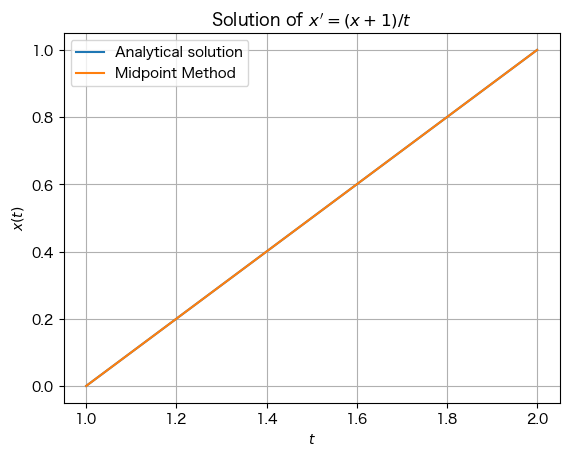

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def midpoint_method(f, x0, t0, tn, h):
    """
    中点法（修正オイラー法）を用いて常微分方程式を数値的に解く関数
    :param f: 常微分方程式の右辺の関数 f(t, x) 
    :param x0: 初期値 x(t0)
    :param t0: 初期時刻
    :param tn: 最終時刻
    :param h: 刻み幅
    :return: 時刻と近似解のリスト
    """
    t_values = [t0] # t_0の値を格納したリストを作成
    x_values = [x0] # x_0の値（初期値）を格納したリストを作成
    
    t = t0
    x = x0
    
    while t < tn: # 最終時刻になるまで繰り返す
        x_mid = x + (h/2) * f(x, t)  # 中間点での傾き
        t_mid = t + h/2  # 中間点での時刻
        x = x + h * f(x_mid, t_mid)  # 値の更新
        t = t + h
        
        # 計算された値をリストに追加
        t_values.append(t)
        x_values.append(x)
        
    return t_values, x_values

# 微分方程式の右辺
def f(x, t):
    return (x + 1) / t

# 解析解
def analytical_solution(t):
    return t - 1

# 初期値とパラメータ
x0 = 0.0 # 初期値
t0 = 1  # 開始時刻
tn = 2  # 終了時刻
h = 0.01  # 刻み幅

plt.figure()
t_analytical = np.linspace(t0, tn, 500) # 区間[開始時刻,終了時刻]で時刻を500点サンプリング
x_analytical = analytical_solution(t_analytical) # 解析解の計算
plt.plot(t_analytical, x_analytical, label='Analytical solution') # 解析解のプロット 

t_midpoint, x_midpoint = midpoint_method(f, x0, t0, tn, h) # 中点法の実行
plt.plot(t_midpoint, x_midpoint, label="Midpoint Method") # 中点法の結果のプロット
plt.title(r"Solution of $x' = (x + 1) / t$")
plt.xlabel(r'$t$')
plt.ylabel(r'$x(t)$')
plt.legend()
plt.grid(True)
plt.show()